In [1]:
import sys
sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, measurement_process_tomography, tomographic_gate_set_tomography
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel
from utils_plots import *

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [3]:
backend = provider.get_backend('ibm_perth')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)

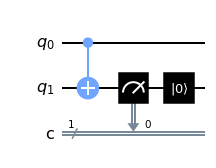

In [4]:
qc = QuantumCircuit(2,1)
qc.cx(0,1)
qc.measure(1,0)
qc.reset(1)
qc.draw(output='mpl')

In [5]:
gst = tomographic_gate_set_tomography( 1 )
mpt = measurement_process_tomography( 1, 1, 1 ) 
qcs = mpt.circuits( qc )
qcs0 = gst.circuits()
# results = simulator.run(qcs+qcs0,shots=1e3).result()
# gate_set = gst.fit( results )
# mpt.fit( results, gate_set= gst.gateset2spam(gate_set) )

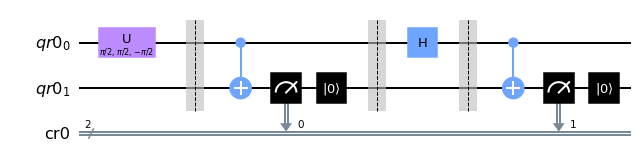

In [6]:
qcs[13].draw(output='mpl')

In [7]:
# qc_t = transpile( qcs+qcs0, backend, optimization_level=1 )
# for _ in range(5):
#     job = backend.run( qc_t, shots=1000 )
#     print( job.job_id() )

# old sin gst
# print( job.status() )
#'631631fc76e4d11a360b411a' 1p
#'631632cd76f8e3964495d4f9' 1p lvl2
#'6316328f76f8e325a895d4f6' 2p
#'631632b276f8e3156995d4f8' 2p lvl2

#new con gst
# ibm_lagos
# 632b99110cfeef786c7de51b
# 632b9915d745a570154a4a43
# 632b9916e150f148119e0aeb
# 632b991805c8fd2495900680
# 632b991ae150f1512b9e0aec
# ibm_perth
# 632b994ad95c8ef7bd62c877
# 632b994ce150f16a8f9e0aee
# 632b994e6b619a56910d6b03
# 632b994f6b619aca230d6b04
# 632b9951e150f173079e0aef
# ibm_nairobi
# 632b9974fcf0f3856feacade
# 632b99760cfeef5ed47de51e
# 632b99786b619abb9c0d6b06
# 632b99796b619a53a60d6b07
# 632b997c3543ab3660b477af

In [8]:
jobs_id = [
            '632b994ad95c8ef7bd62c877',
            '632b994ce150f16a8f9e0aee',
            '632b994e6b619a56910d6b03',
            '632b994f6b619aca230d6b04',
            '632b9951e150f173079e0aef']

In [9]:
results = []
for job_id in jobs_id:
    job = backend.retrieve_job(job_id)
    results.append( job.result() )


In [ ]:
chois = []
povms = []
for j in range(5):
    results_gst = gst.fit( results[j] )
    gate_set = [results_gst.states, results_gst.measurements, results_gst.processes ] 
    results_mpt = mpt.fit( results[j], gate_set= gst.gateset2spam(gate_set) )
    chois.append( results_mpt.chois[0] )
    povms.append( results_mpt.povms[0] )

In [ ]:
chois[0]

[array([[ 9.42101069e-01+0.j        ,  4.04546700e-03+0.01755409j,
          4.04546700e-03-0.01755409j,  3.91236074e-04+0.j        ],
        [ 2.66891356e-02-0.01517667j, -3.27799483e-02-0.01538607j,
          2.97810930e-04+0.00029301j, -2.14661528e-04+0.00019215j],
        [ 2.66891356e-02+0.01517667j,  2.97810930e-04-0.00029301j,
         -3.27799483e-02+0.01538607j, -2.14661528e-04-0.00019215j],
        [ 2.20072274e-02+0.j        , -2.67848944e-03-0.00460417j,
         -2.67848944e-03+0.00460417j,  3.21933249e-02+0.j        ]]),
 array([[ 0.01484888+0.j        , -0.00875081-0.00523126j,
         -0.00875081+0.00523126j,  0.04064895+0.j        ],
        [-0.00406197-0.00371038j, -0.01399953+0.01269189j,
         -0.02001721-0.00596251j,  0.03384492-0.01629401j],
        [-0.00406197+0.00371038j, -0.02001721+0.00596251j,
         -0.01399953-0.01269189j,  0.03384492+0.01629401j],
        [ 0.02104249+0.j        ,  0.00738524-0.00771845j,
          0.00738524+0.00771845j,  0.92676

In [ ]:
Quantities( np.mean(povms,0), np.mean(chois,0) )

(0.968239708022263, 0.9410174876749959, 0.9723271886883587)

[<Axes3DSubplot:>, <Axes3DSubplot:>]

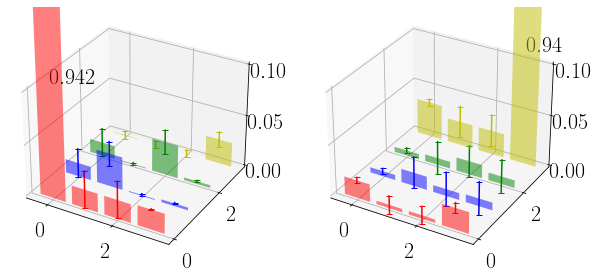

In [ ]:
Plot_Chois( np.mean( chois, 0 ), np.std( chois, axis=0 )  )